In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io
import scipy.fft
from sklearn.metrics import confusion_matrix

In [2]:
import os

In [3]:
data_files = {
    data_dir: [
        os.path.join('../data', data_dir, f) for f in os.listdir(os.path.join('../data', data_dir)) if f.endswith('.wav')
    ]
    for data_dir in os.listdir('../data')
}

In [4]:
data = {
    data_dir: list(map(scipy.io.wavfile.read, files))
    for data_dir, files in data_files.items()
}

In [5]:
for data_dir, data_vals in data.items():
    print(data_dir, 'lengths:', *map("{:.2f}".format, (v.shape[0] / rate for rate, v in data_vals)), sep='\t')

blue	lengths:	3.50	2.47	2.60	2.35	2.05	2.33	2.20	2.84	2.99
green	lengths:	2.56	2.75	2.84	2.60	2.52	1.92	2.58	2.73	2.09
nie	lengths:	2.47	2.71	2.67	2.56	2.52	2.07	2.22	2.26	2.45
one	lengths:	2.94	3.37	3.41	3.01	3.41	2.22	2.45	2.75	2.43
red	lengths:	2.56	2.56	2.65	1.77	1.73	1.90	1.83	2.18	2.33
tak	lengths:	2.43	2.33	2.67	2.45	2.28	2.35	2.18	1.83	2.82
two	lengths:	2.52	2.56	2.62	2.56	2.60	1.96	2.73	2.39	2.62
_	lengths:	2.62	2.71	2.52	2.56	2.75	2.37	2.22	2.65	2.69


In [6]:
def find_window(values, width):
    fw = np.cumsum(np.abs(values))
    
    start = np.argmax([fw[width + i] - fw[i] for i in range(len(values) - width)])
    end = start + width
    
    return start, end, np.mean(np.abs(values[:start])), np.mean(np.abs(values[end:]))

blue


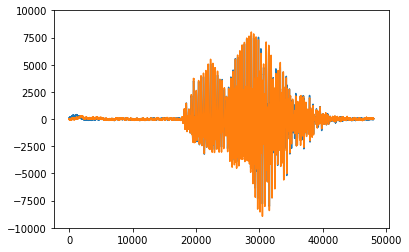

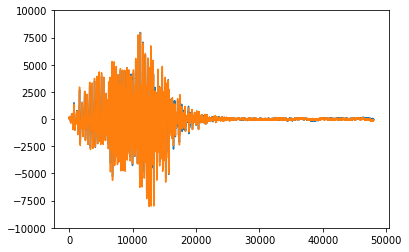

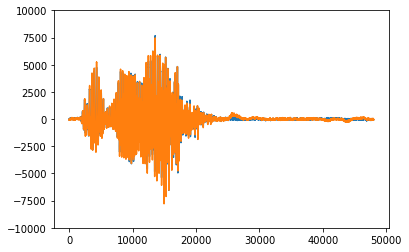

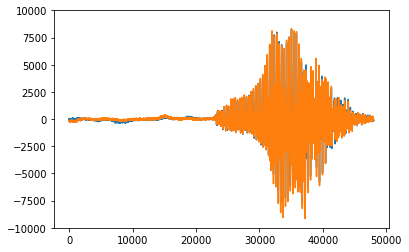

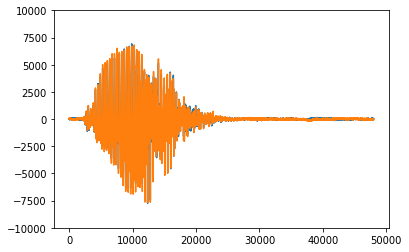

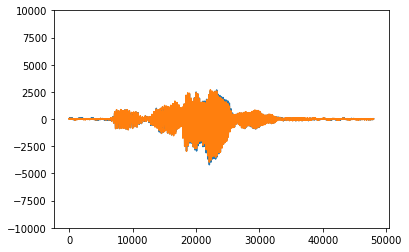

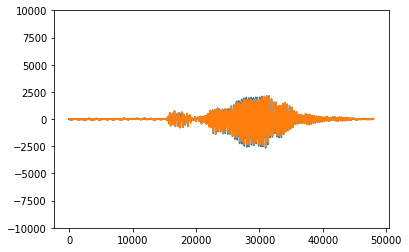

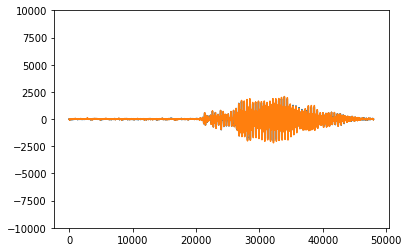

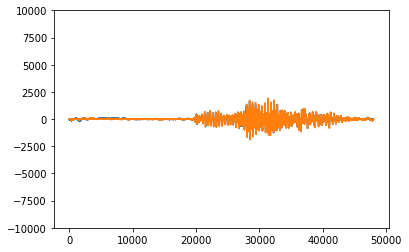

green


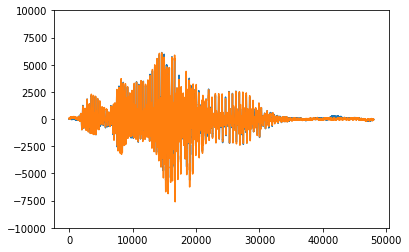

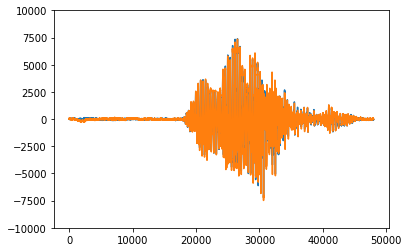

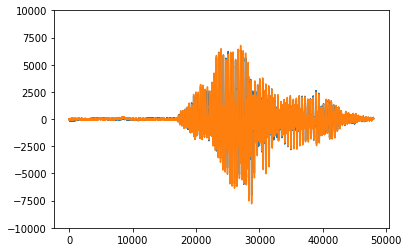

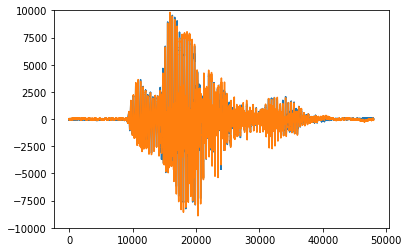

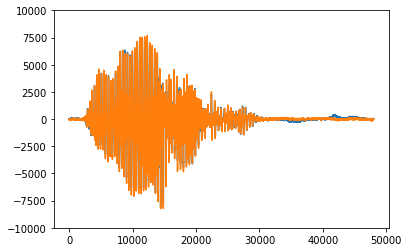

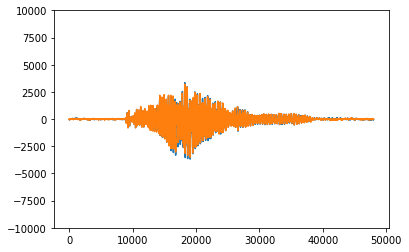

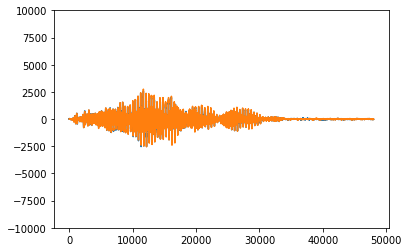

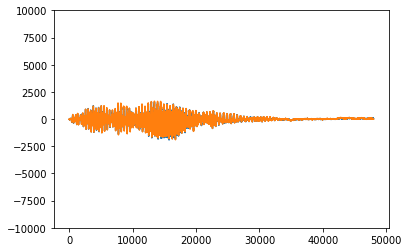

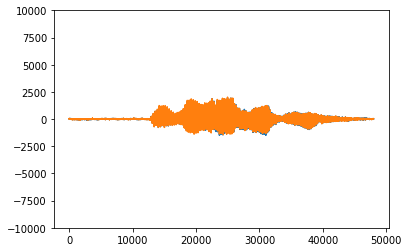

nie


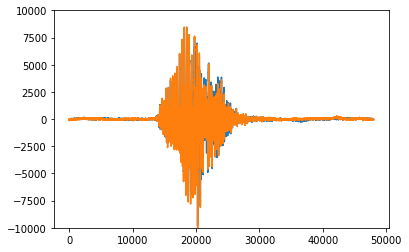

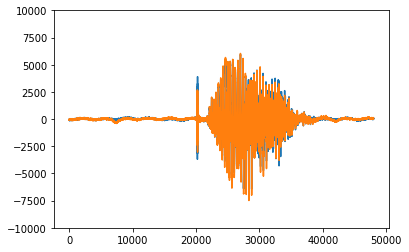

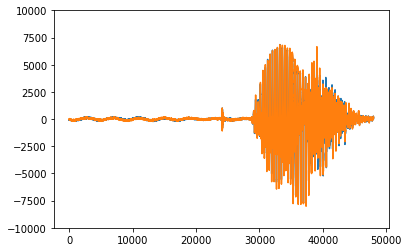

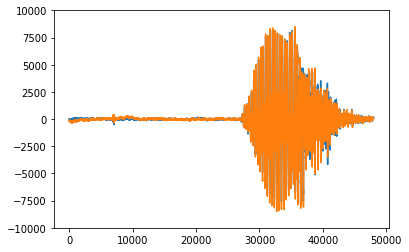

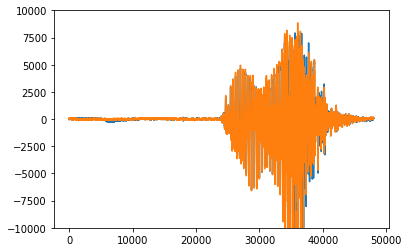

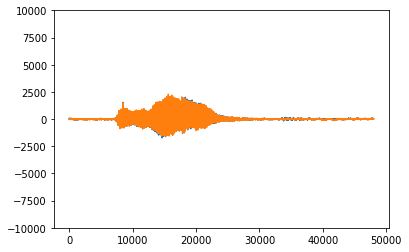

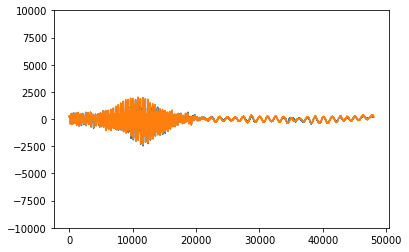

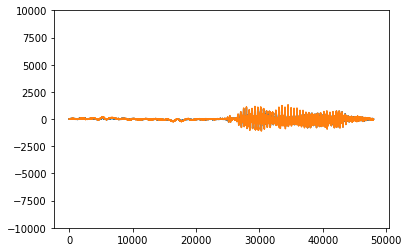

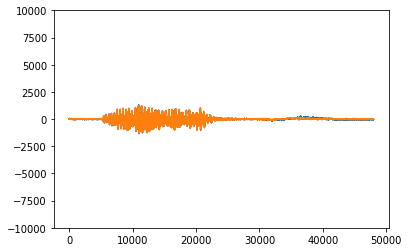

one


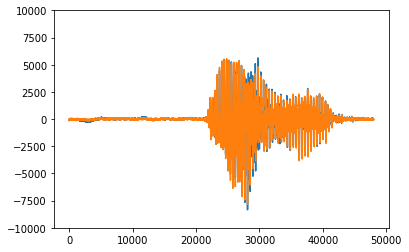

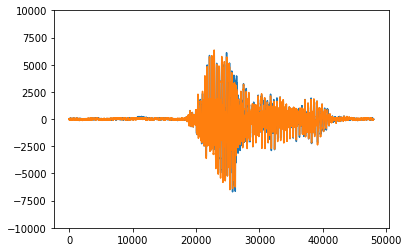

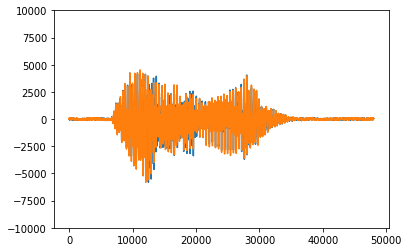

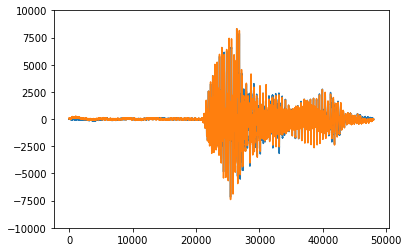

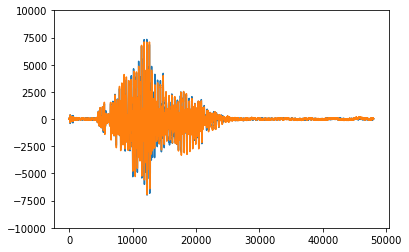

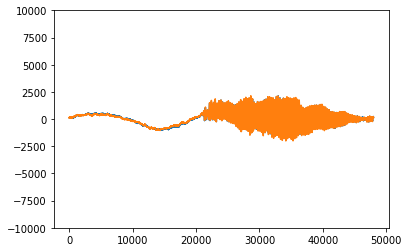

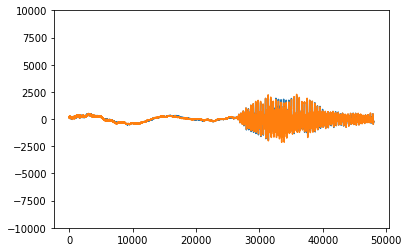

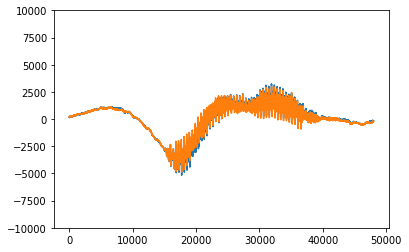

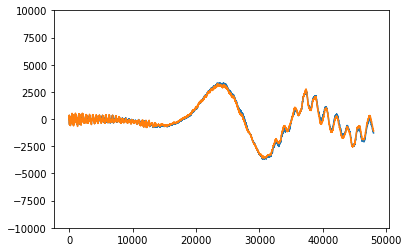

red


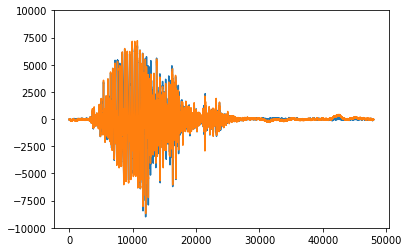

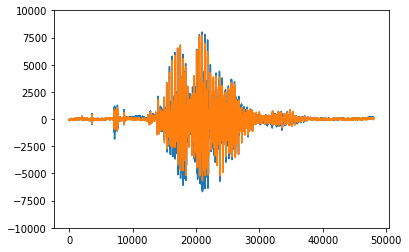

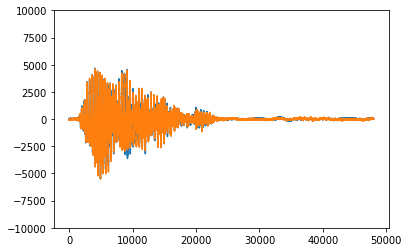

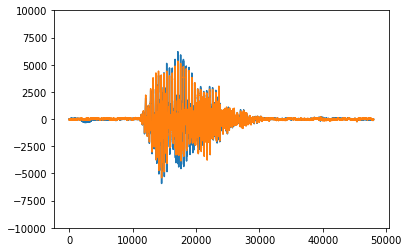

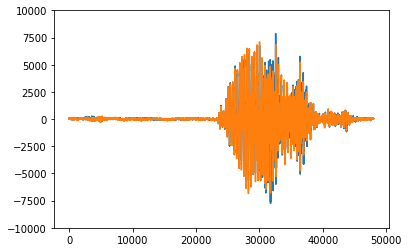

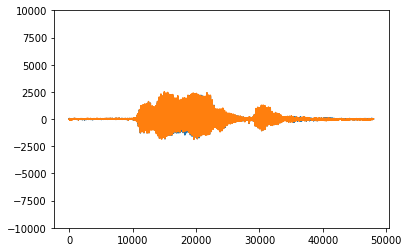

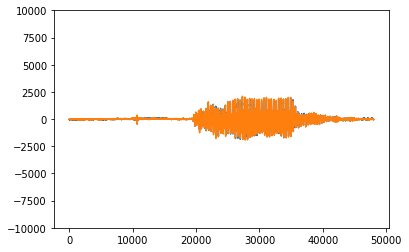

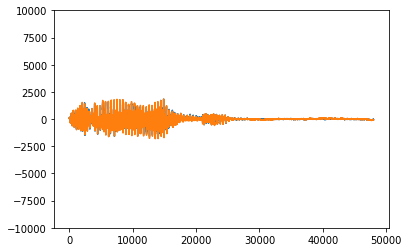

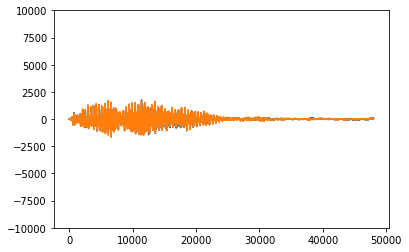

tak


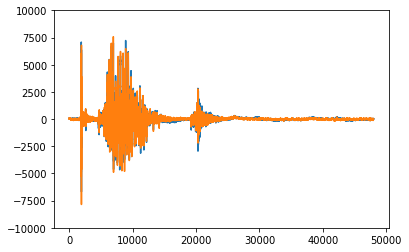

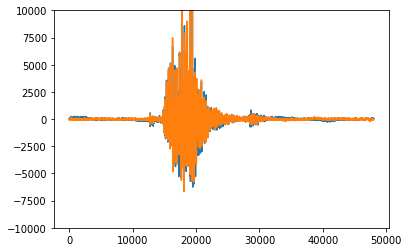

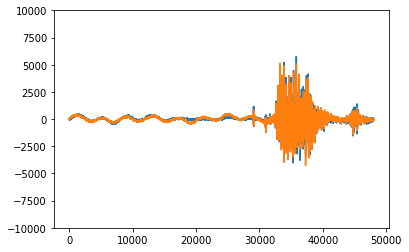

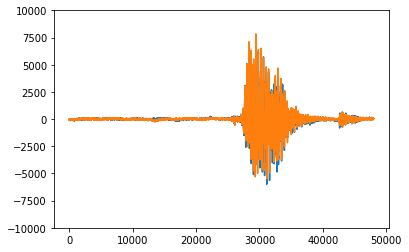

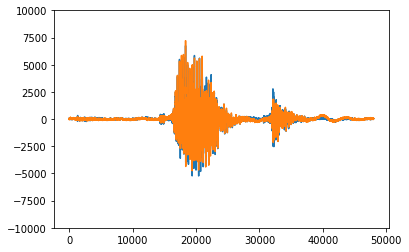

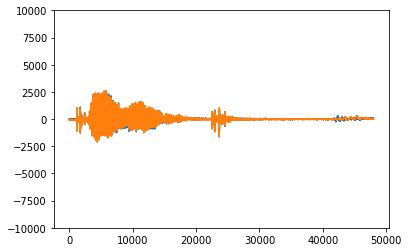

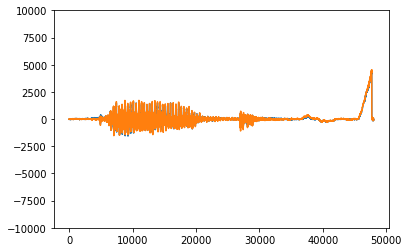

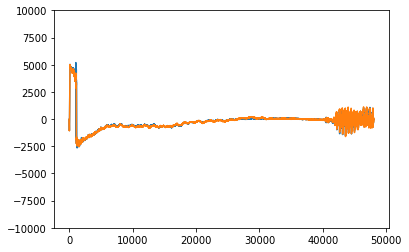

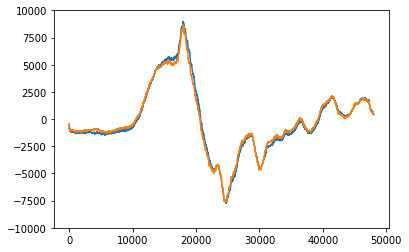

two


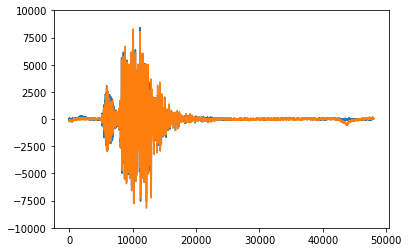

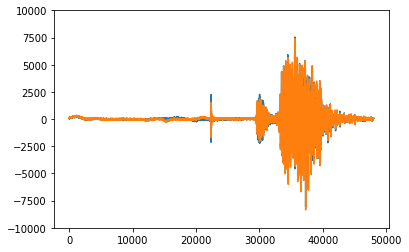

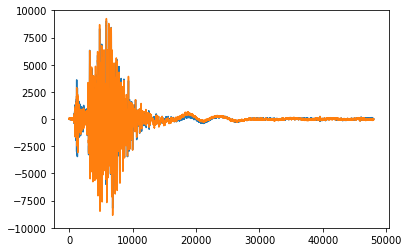

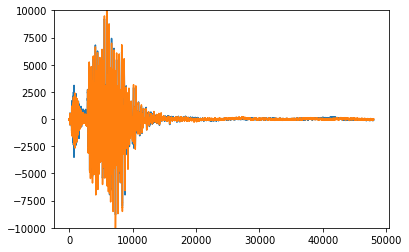

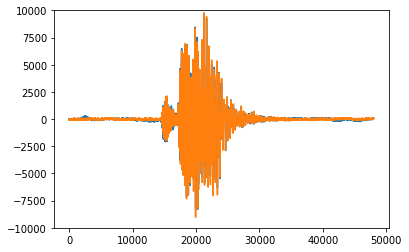

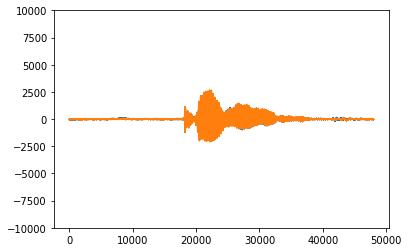

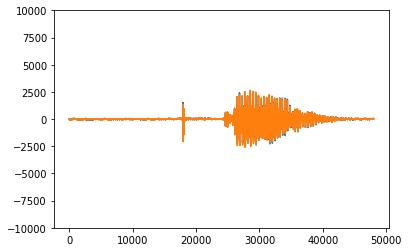

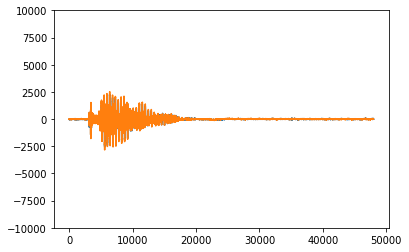

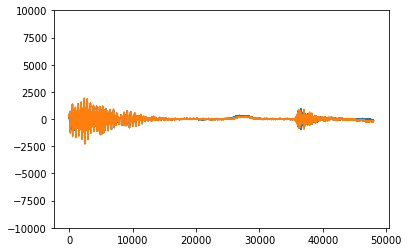

_


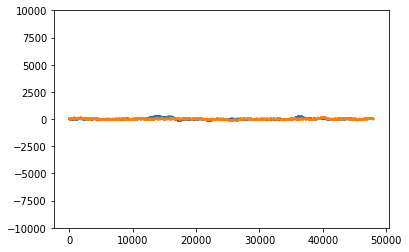

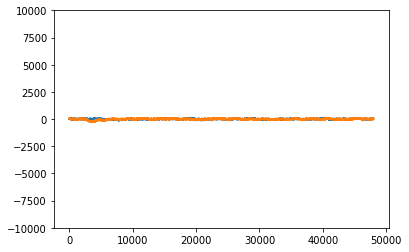

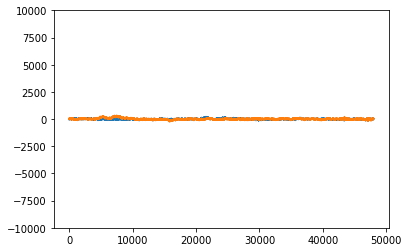

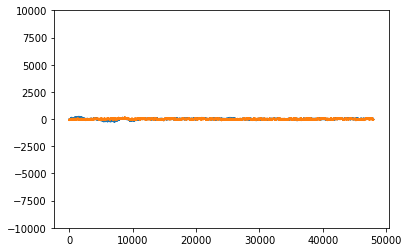

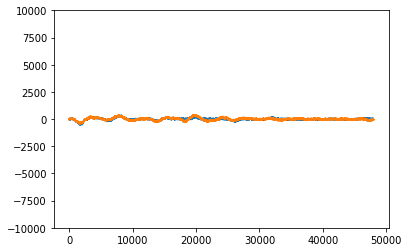

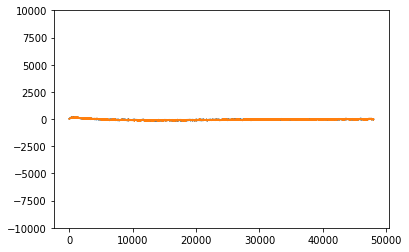

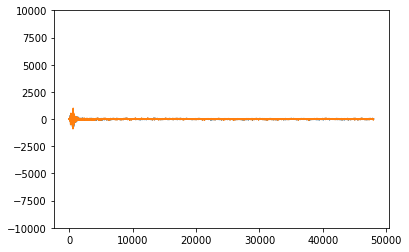

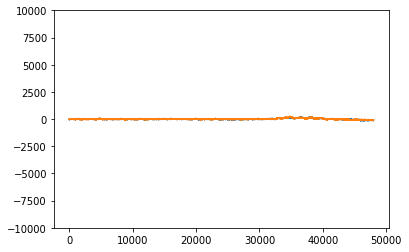

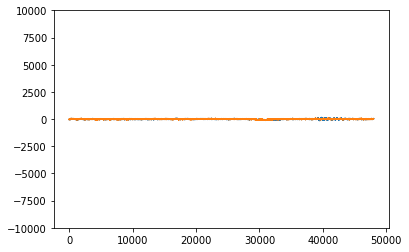

In [162]:
threshold = 0

data_processed = {}

for data_dir, data_vs in data.items():
    print(data_dir)
    data_processed[data_dir] = []
    for data_v in data_vs:
        s, e, _, _ = find_window(data_v[1].mean(-1), data_v[0])
        processed = data_v[1][s:e]
        processed = processed * ((processed < -threshold) | (processed > threshold))
        plt.plot(processed)
        plt.ylim(-10000, 10000)
        plt.show()
        data_processed[data_dir].append((data_v[0], processed[:,0]))
        data_processed[data_dir].append((data_v[0], processed[:,1]))

        
        

In [170]:
for row in scipy.fft.fftfreq(8000, 1/8000).reshape((100, 80)):
    print(row)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79.]
[ 80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107.
 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121.
 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135.
 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149.
 150. 151. 152. 153. 154. 155. 156. 157. 158. 159.]
[160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173.
 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187.
 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201.
 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212

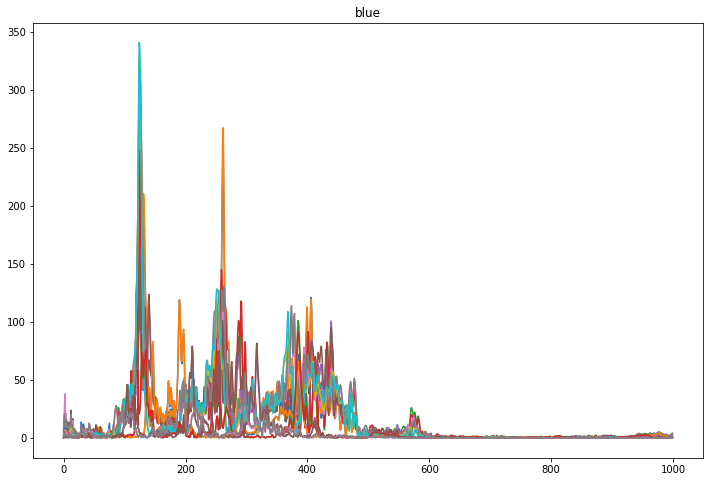

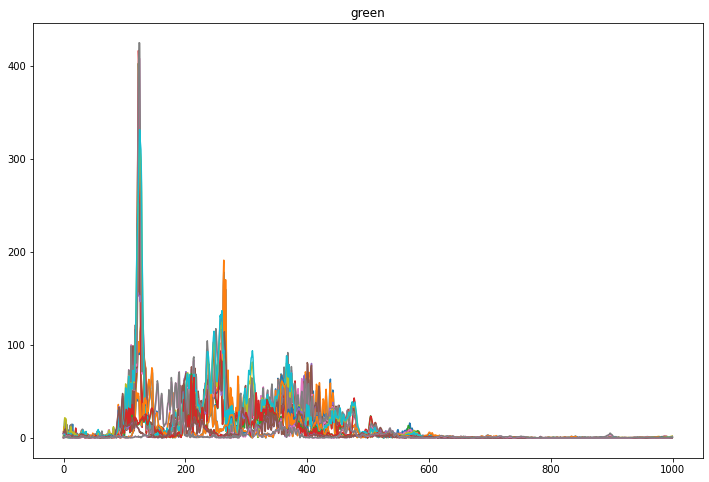

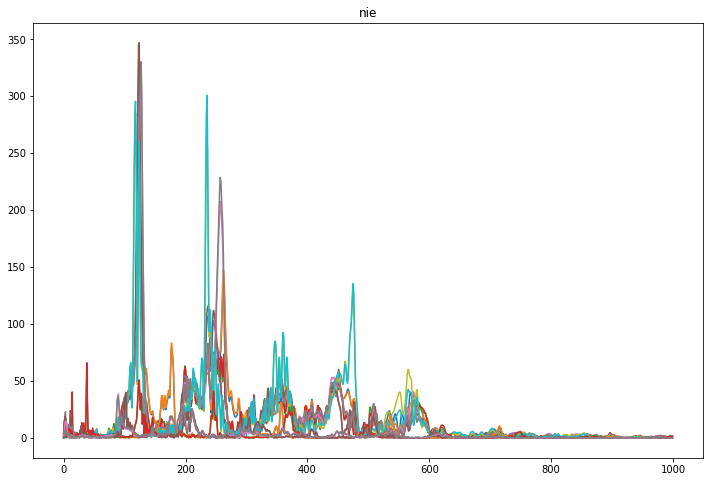

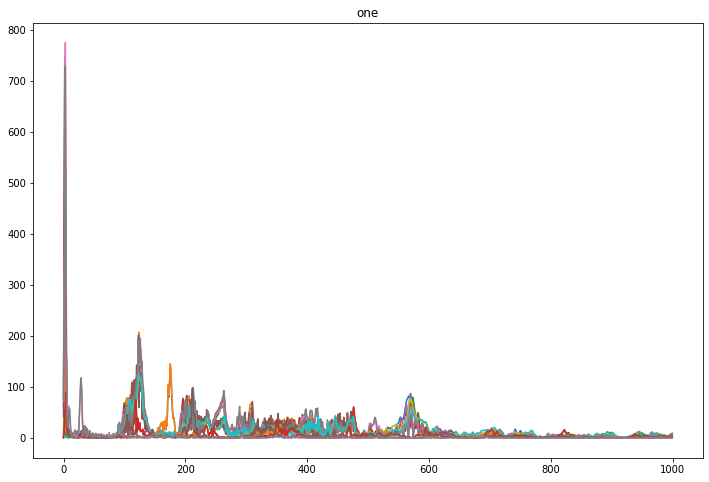

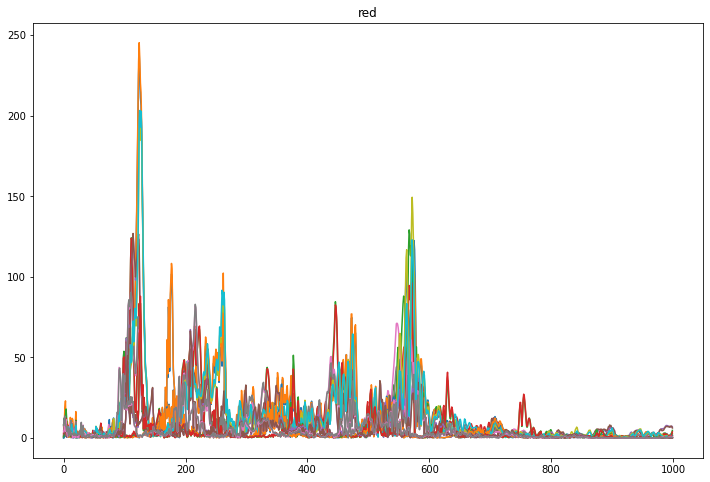

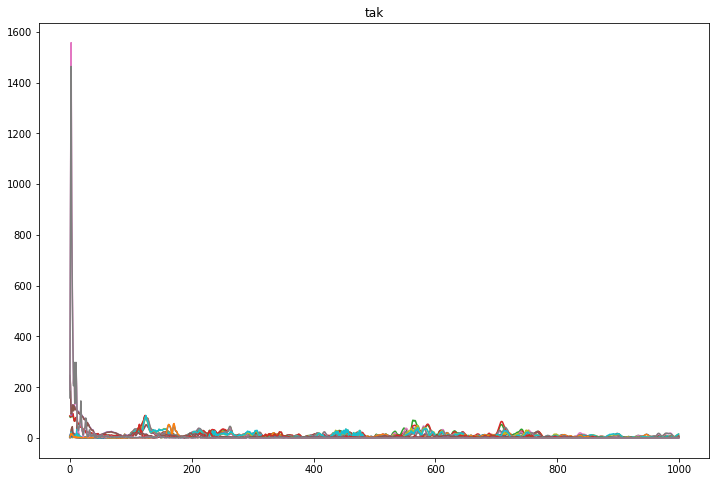

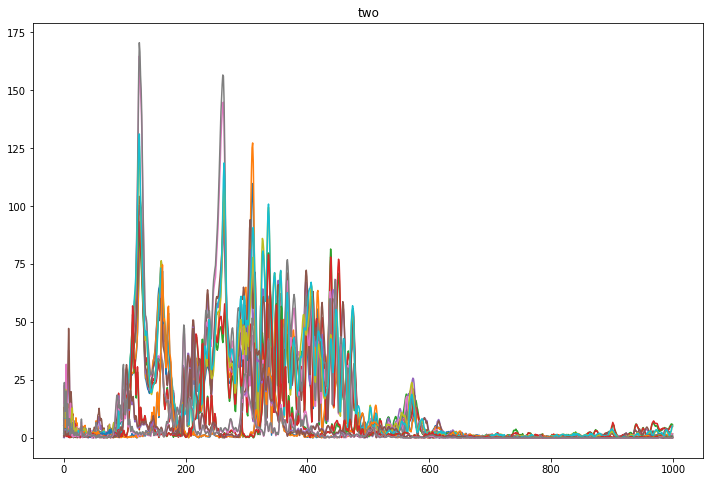

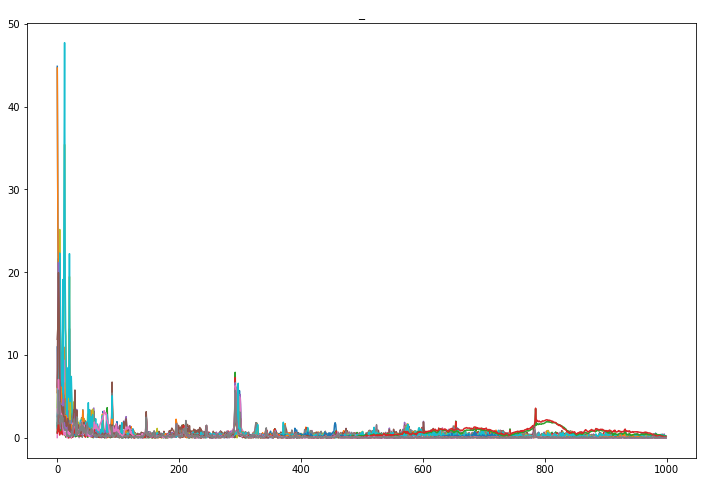

In [163]:
for category, cat_data in data_processed.items():
    plt.figure(figsize=(12, 8))
    plt.title(category)
    for rate, wav in cat_data:
        y = np.abs(scipy.fft.fft(wav))
        x = scipy.fft.fftfreq(wav.shape[0], 1/rate)
        plt.plot(x[:x.shape[0] // 2][:1000], y[:x.shape[0] // 2][:1000] / x.shape[0])
    plt.show()

31787 67787


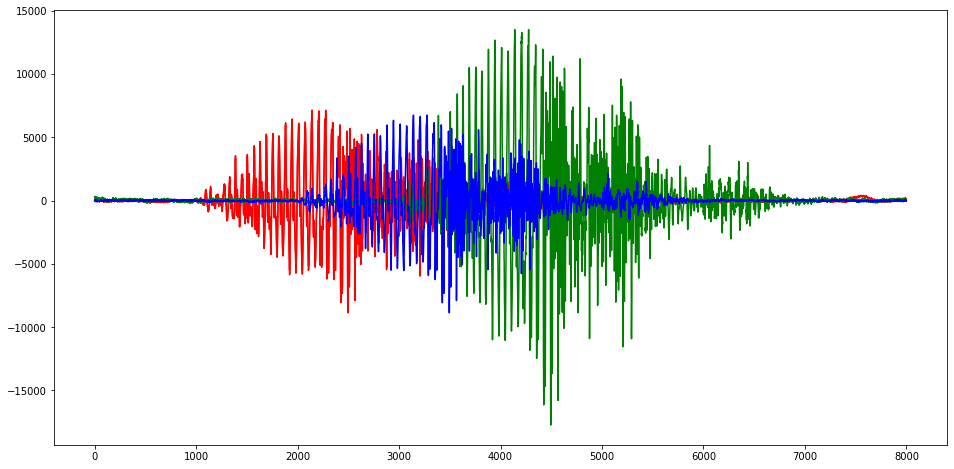

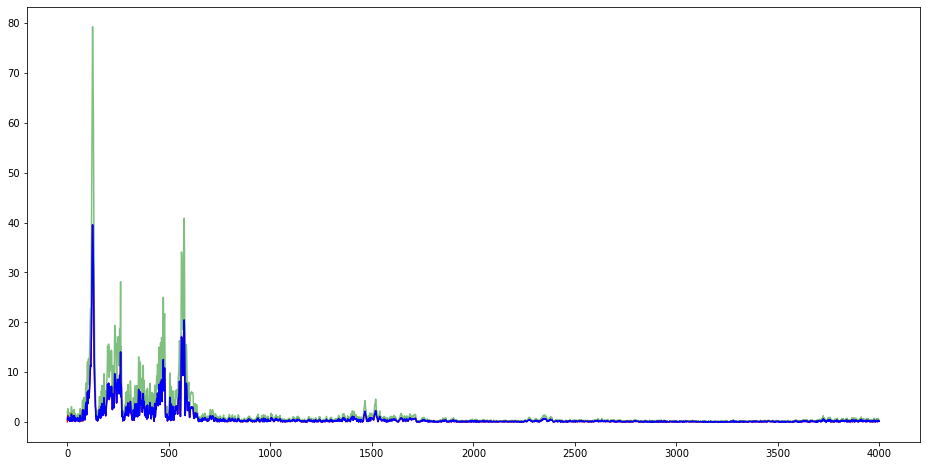

In [174]:

s, e, _, _ = find_window(data['red'][0][1][:,0], 36000)
print(s, e)
plt.figure(figsize=(16,8))
plt.plot(data['red'][0][1][s:e+12000:(48000//8000),0:], c='red')
plt.plot(2 * data['red'][0][1][s-12000:e:(48000//8000),0], c='green')
plt.plot(data['red'][0][1][s-6000:e+6000:(48000//8000),0], c='blue')
plt.show()
plt.figure(figsize=(16,8))
plt.plot(np.abs(scipy.fft.fft(data['red'][0][1][s:e+12000:(48000//8000),0]))[:4000] / 48000, c='red')
plt.plot(np.abs(scipy.fft.fft(2 * data['red'][0][1][s-12000:e:(48000//8000),0]))[:4000] / 48000, alpha=0.5, c='green')
plt.plot(np.abs(scipy.fft.fft(data['red'][0][1][s-6000:e+6000:(48000//8000),0]))[:4000] / 48000, c='blue')
plt.show()

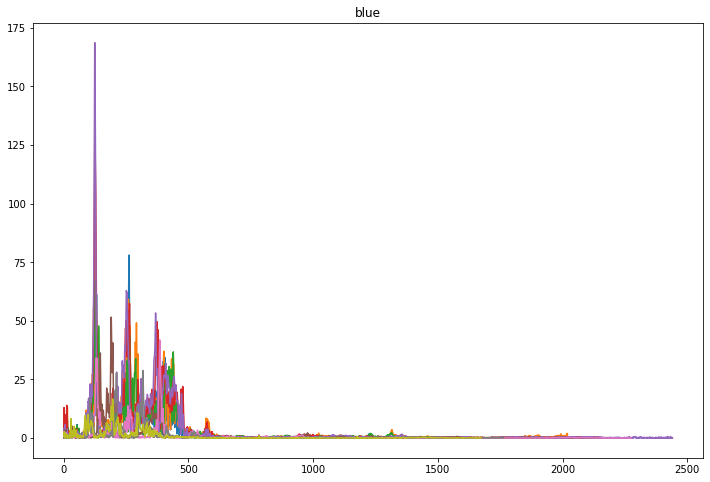

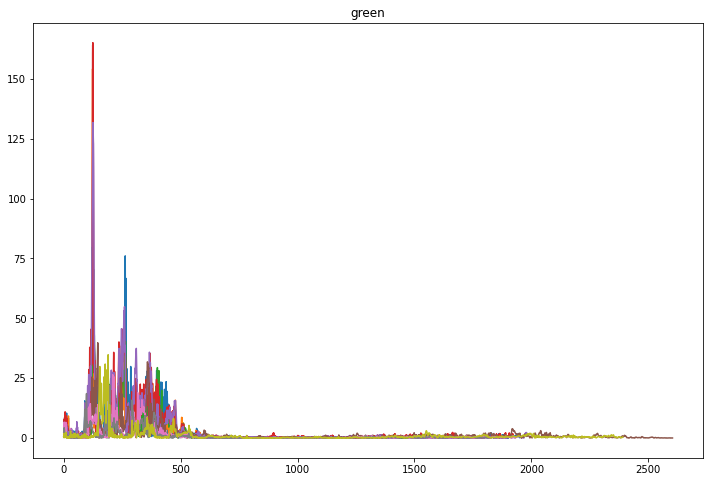

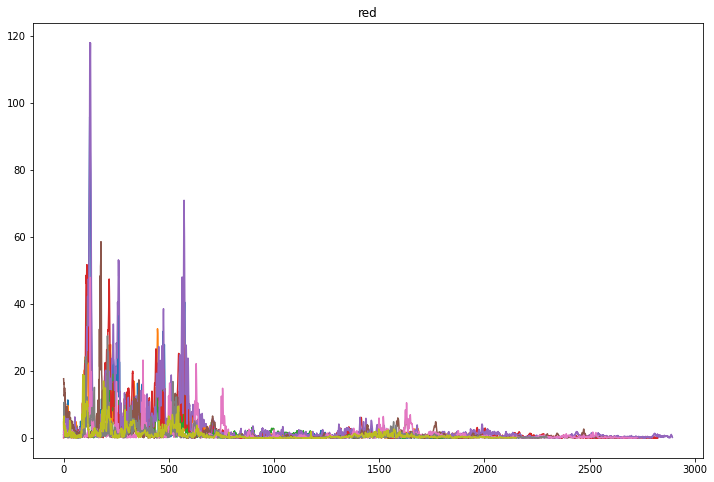

In [9]:
for category, cat_data in data.items():
    if category not in ('red', 'green', 'blue'):
        continue
    plt.figure(figsize=(12, 8))
    plt.title(category)
    for rate, wav in cat_data:
        y = np.abs(scipy.fft.fft(wav[:,1]))
        x = scipy.fft.fftfreq(wav.shape[0], 1/rate)
        plt.plot(x[:x.shape[0] // 2][:5000], y[:x.shape[0] // 2][:5000] / x.shape[0])
    plt.show()

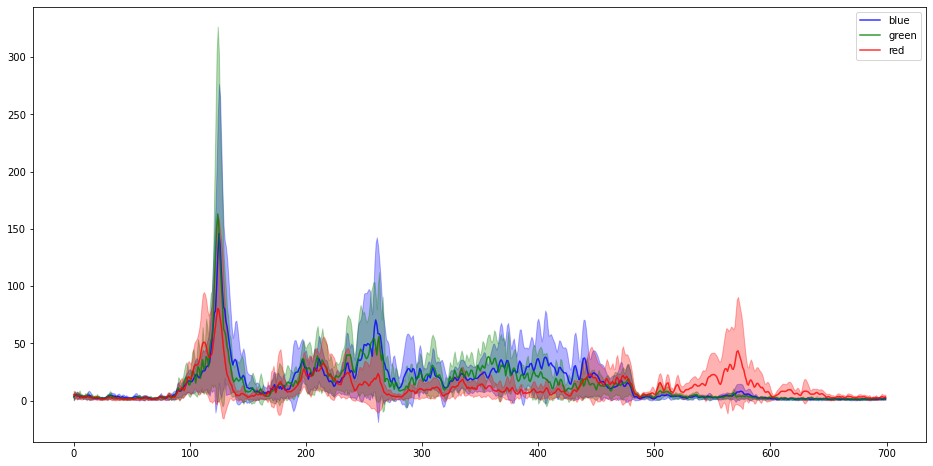

In [10]:
W = 700

plt.figure(figsize=(16, 8))
for category, cat_data in data_processed.items():
    if category not in ('red', 'green', 'blue'):
        continue
    assert len(set(rate for rate, _ in cat_data)) == 1
    ys = []
    for rate, wav in cat_data:
        y = np.abs(scipy.fft.fft(wav))
        x = scipy.fft.fftfreq(wav.shape[0], 1/rate)
        ys.append(y)

    X = x[:x.shape[0] // 2][:W]
    Ym = np.mean(ys, 0)[:x.shape[0] // 2][:W] / x.shape[0]
    Ys = np.std(ys, 0)[:x.shape[0] // 2][:W] / x.shape[0]
    plt.plot(X, Ym, label=category, alpha=0.8, c=category)
    plt.fill_between(X, Ym+Ys, Ym-Ys, alpha=0.3, color=category)
plt.legend()
plt.show()

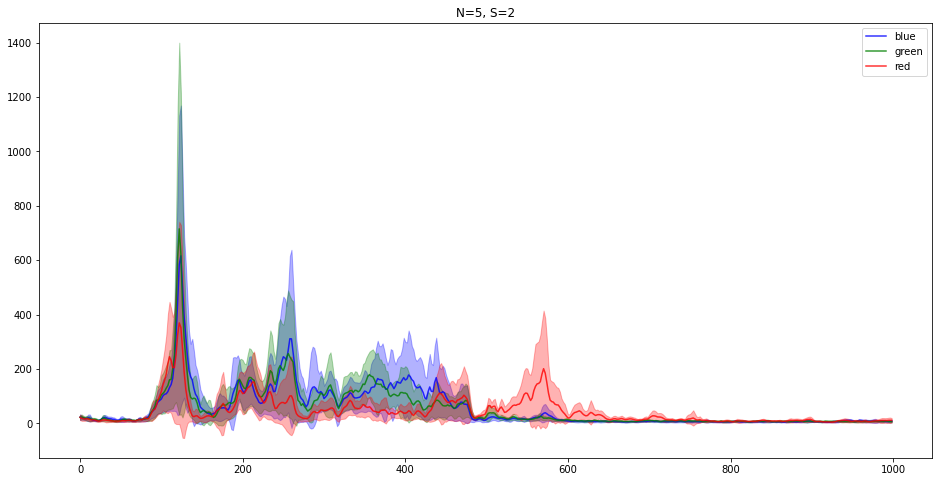

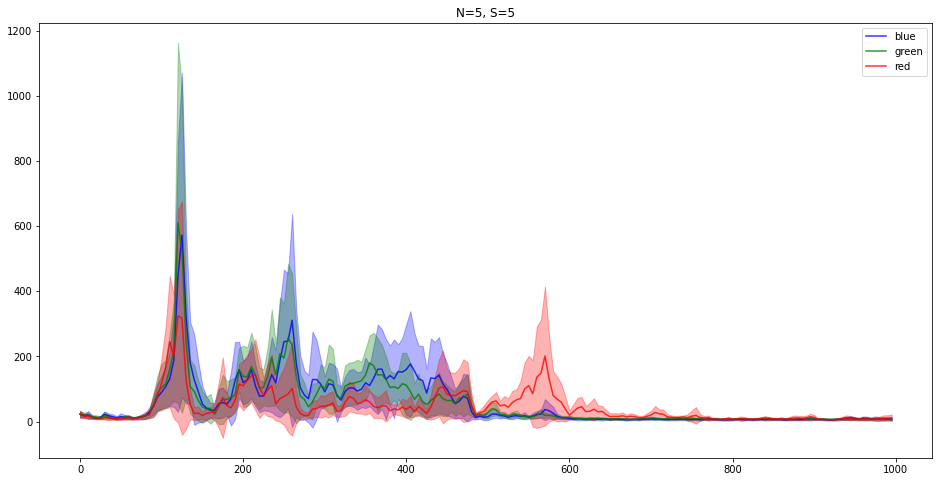

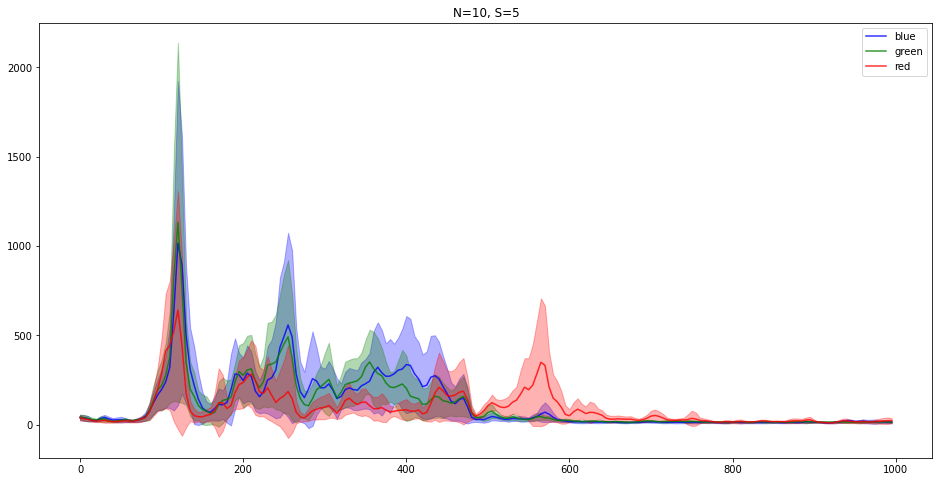

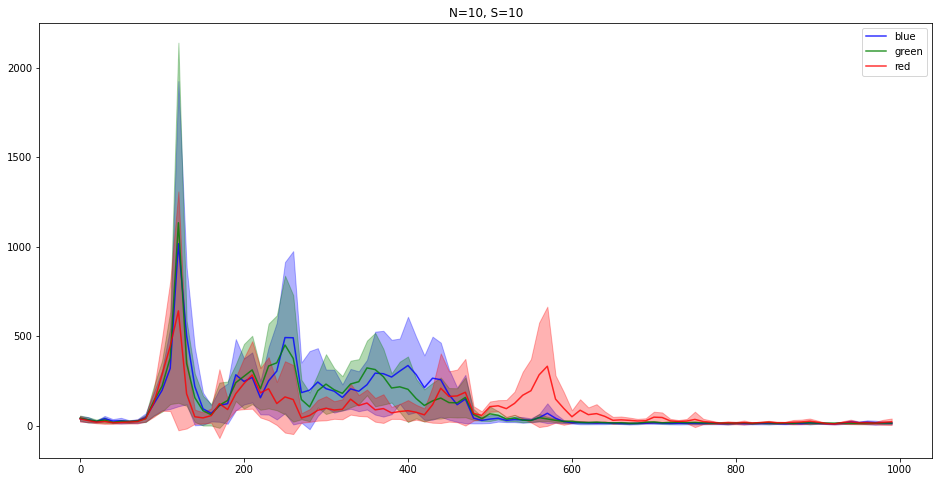

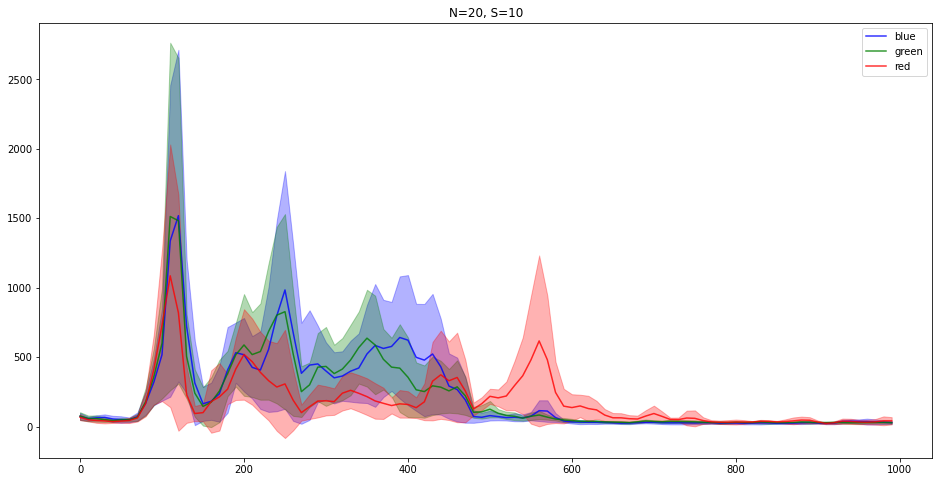

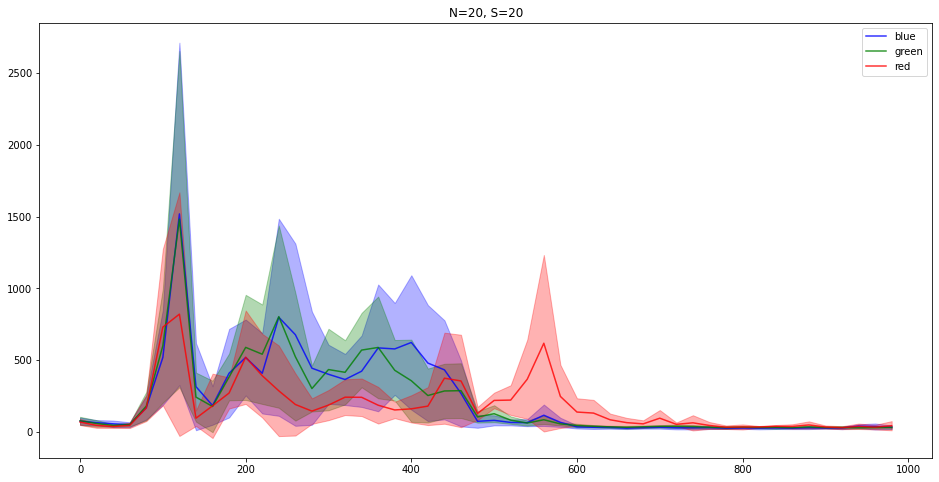

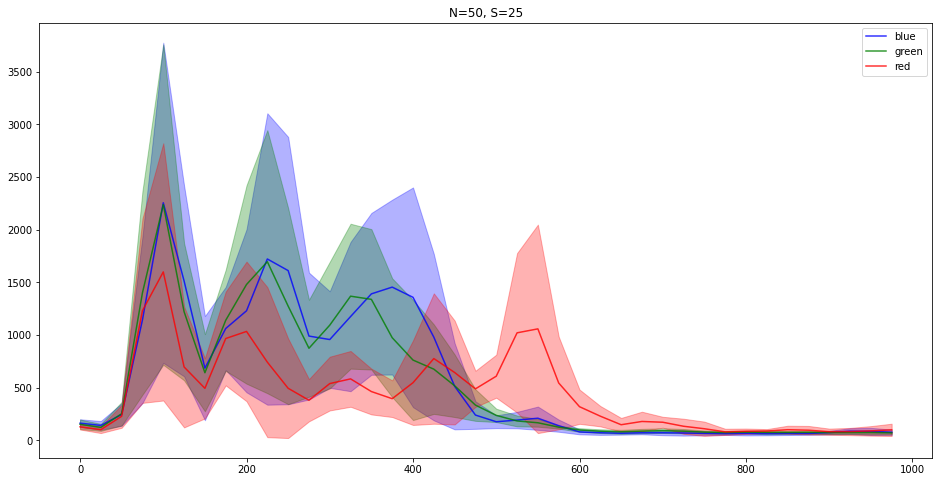

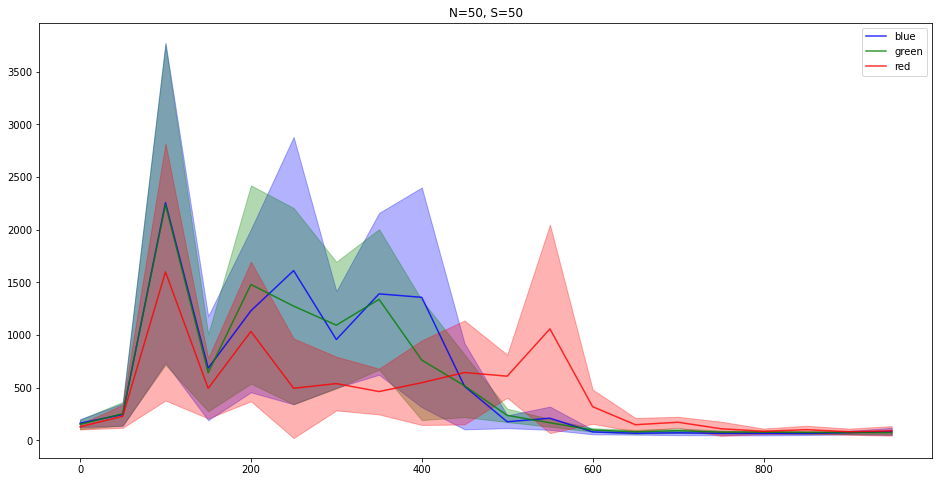

In [115]:
for N in (5, 10, 20, 50):
    for S in (N//2, N):
        W = 1000

        plt.figure(figsize=(16, 8))
        plt.title(f'N={N}, S={S}')
        for category, cat_data in data_processed.items():
            if category not in ('red', 'green', 'blue'):
                continue
            assert len(set(rate for rate, _ in cat_data)) == 1
            ys = []
            for rate, wav in cat_data:
                y = np.abs(scipy.fft.fft(wav))
                x = scipy.fft.fftfreq(wav.shape[0], 1/rate)
                ys.append(np.convolve(y, np.ones(N), 'valid'))

            X = x[:x.shape[0] // 2][:W][::S]
            Ym = np.mean(ys, 0)[:x.shape[0] // 2][:W][::S] / x.shape[0]
            Ys = np.std(ys, 0)[:x.shape[0] // 2][:W][::S] / x.shape[0]
            plt.plot(X, Ym, label=category, alpha=0.8, c=category)
            plt.fill_between(X, Ym+Ys, Ym-Ys, alpha=0.3, color=category)
        plt.legend()
        plt.show()

In [14]:
W = 700
keypoints = list(range(0, W, 20))

Xs = {}
Tms = {}
Yss = {}

plt.figure(figsize=(16, 8))
for category, cat_data in data_processed.items():
    if category not in ('red', 'green', 'blue'):
        continue
    assert len(set(rate for rate, _ in cat_data)) == 1
    ys = []
    for rate, wav in cat_data:
        y = np.abs(scipy.fft.fft(wav))
        x = scipy.fft.fftfreq(wav.shape[0], 1/rate)
        ys.append(y)

    Xs[category] = x[:x.shape[0] // 2][:W]
    Yms[category] = np.mean(ys, 0)[:x.shape[0] // 2][:W] / x.shape[0]
    Yss.append(np.std(ys, 0)[:x.shape[0] // 2][:W] / x.shape[0])

for category, cat_data in data_processed.items():
    
    plt.plot(X[keypoints], Ym[keypoints], label=category, alpha=0.8, c=category)
    plt.fill_between(X[keypoints], Ym[keypoints]+Ys[keypoints], Ym[keypoints]-Ys[keypoints], alpha=0.3, color=category)
plt.legend()
plt.grid()
plt.show()

NameError: name 'Yms' is not defined

<Figure size 1152x576 with 0 Axes>

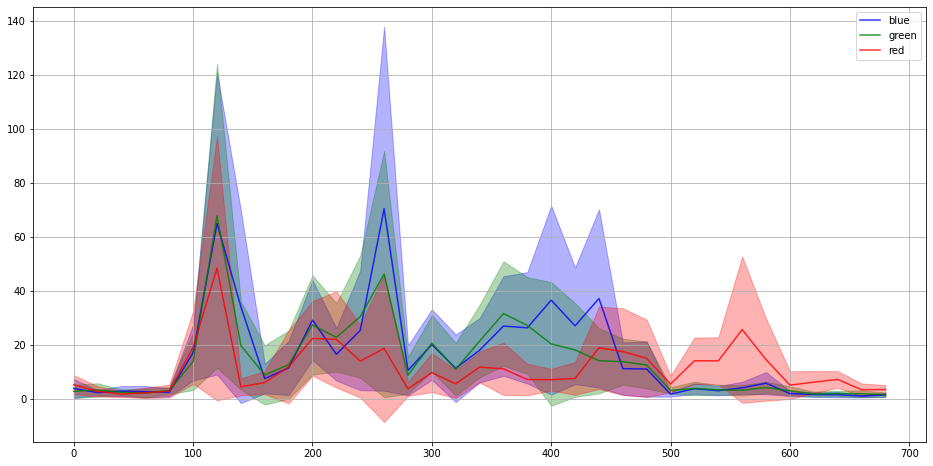

In [15]:
W = 700
keypoints = list(range(0, W, 20))

plt.figure(figsize=(16, 8))
for category, cat_data in data_processed.items():
    if category not in ('red', 'green', 'blue'):
        continue
    assert len(set(rate for rate, _ in cat_data)) == 1
    ys = []
    for rate, wav in cat_data:
        y = np.abs(scipy.fft.fft(wav))
        x = scipy.fft.fftfreq(wav.shape[0], 1/rate)
        ys.append(y)

    X = x[:x.shape[0] // 2][:W]
    Ym = np.mean(ys, 0)[:x.shape[0] // 2][:W] / x.shape[0]
    Ys = np.std(ys, 0)[:x.shape[0] // 2][:W] / x.shape[0]
    
    plt.plot(X[keypoints], Ym[keypoints], label=category, alpha=0.8, c=category)
    plt.fill_between(X[keypoints], Ym[keypoints]+Ys[keypoints], Ym[keypoints]-Ys[keypoints], alpha=0.3, color=category)
plt.legend()
plt.grid()
plt.show()

In [44]:
W = 700
KEYPOINTS = [120, 200, 230, 260, 300, 350, 400, 440, 560]

def preprocess_fft(rate, signal, keypoints):
    assert rate == 48000 and signal.shape[0] == rate
    return np.abs(scipy.fft.fft(signal))[keypoints] / signal.shape[0]

def make_template(signals, keypoints):
    ffts = [preprocess_fft(rate, signal, keypoints) for rate, signal in signals]
    return np.mean(ffts, 0), np.std(ffts, 0)

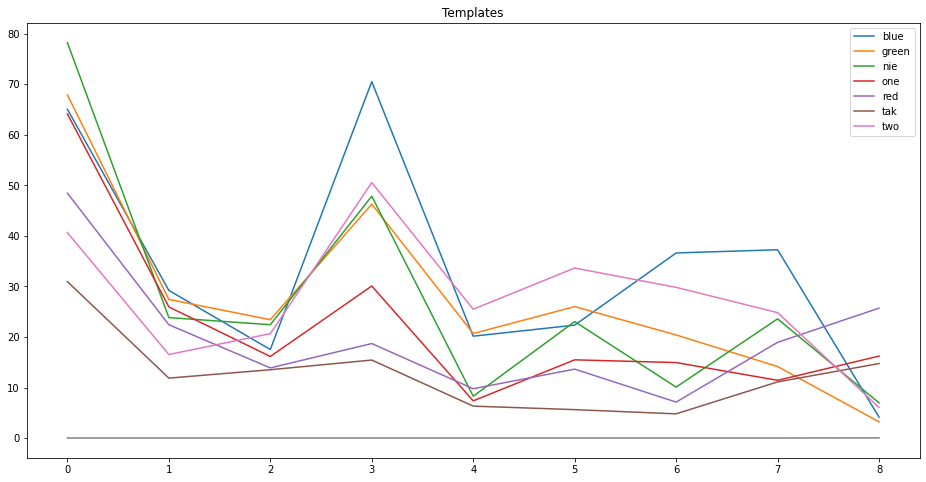

In [46]:
templates = {}

plt.figure(figsize=(16, 8))
plt.title('Templates')
for category, cat_data in data_processed.items():
    template = make_template(cat_data, KEYPOINTS)
    templates[category] = template
    plt.plot(template[0], label=category)
plt.legend()
plt.show()

In [47]:
def match(rate, signal, templates, threshold, keypoints, allow_inconc=True):
    fft = preprocess_fft(rate, signal, keypoints)
    matches = [np.mean(((tm - fft) / ts) ** 2) for tm, ts in templates.values()]

    best = list(templates.keys())[np.argmin(matches)] if np.min(matches) < threshold else 'None'
    cat_matched = np.sum(np.array(matches) < threshold)
    if allow_inconc and cat_matched > 1:
        best = 'Incon.'

    return best, matches

In [48]:
THRESHOLD = 1

results = []

print('sample', 'match', *templates.keys(), sep='\t  ')
print()

for category, cat_data in data_processed.items():
    for i, (rate, signal) in enumerate(cat_data):
        best, matches = match(rate, signal, templates, THRESHOLD, KEYPOINTS)
        results.append((category, best))
        print(f'{category}_{i}', best, *map("{:.2f}".format, matches), sep='\t  ')
results = np.array(results)

sample	  match	  blue	  green	  nie	  one	  red	  tak	  two	  _

blue_0	  None	  1.72	  3.89	  14.97	  11.59	  57.44	  87.41	  3.05	  7509541.70
blue_1	  None	  1.75	  4.01	  20.21	  13.89	  80.03	  107.75	  3.71	  8619673.35
blue_2	  None	  1.09	  5.37	  8.63	  9.70	  33.65	  47.07	  2.81	  5871608.96
blue_3	  None	  1.03	  4.79	  12.47	  11.33	  45.91	  58.24	  3.04	  6419970.40
blue_4	  None	  1.47	  6.58	  4.87	  11.00	  7.13	  28.51	  2.72	  4519078.86
blue_5	  None	  1.30	  5.81	  5.87	  11.46	  8.33	  31.34	  2.68	  4793914.03
blue_6	  blue	  0.42	  2.16	  4.78	  5.10	  20.56	  36.87	  1.88	  4647884.65
blue_7	  blue	  0.65	  2.30	  7.36	  6.17	  30.32	  46.74	  2.07	  5156348.44
blue_8	  blue	  0.22	  1.53	  2.40	  3.04	  10.44	  20.97	  1.18	  3157289.61
blue_9	  blue	  0.24	  1.41	  3.78	  3.63	  15.40	  26.25	  1.26	  3440837.14
blue_10	  Incon.	  0.87	  0.99	  0.52	  0.67	  0.55	  2.57	  1.10	  380657.40
blue_11	  Incon.	  0.83	  0.90	  0.52	  0.68	  0.56	  2.98	  1.17	  47

In [49]:
confusion_matrix(results[:,0], results[:,1], labels=list(templates.keys()) + ["None", "Incon."])

array([[ 4,  0,  0,  0,  0,  0,  0,  0,  7,  7],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  4, 13],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  9,  5],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  9,  7],
       [ 0,  0,  2,  0,  2,  0,  0,  0,  6,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4, 14],
       [ 1,  0,  2,  0,  0,  0,  6,  0,  5,  4],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [50]:
def test_threshold(data, templates, threshold, keypoints, v=True, allow_incon=True):
    res = []

    for category, cat_data in data.items():
        for i, (rate, signal) in enumerate(cat_data):
            best, matches = match(rate, signal, templates, threshold, keypoints, allow_incon)
            res.append((category if category in templates else 'None', best))
    res = np.array(res)

    accuracy = np.sum(res[:,0] == res[:,1]) / len(res)
    precision = np.sum((res[:,0] == res[:,1]) & (res[:,0] != 'None')) / np.sum(res[:,0] != 'None')
    none = np.sum(res[:,1] == "None")
    inconclusive = np.sum(res[:,1] == "Incon.")

    if v:
        print(*map("{:.2f}".format, [threshold, accuracy, precision, none, inconclusive]), sep='\t')
    return [threshold, accuracy, precision, none, inconclusive]
    

def test_thresholds(data, templates, keypoints, v=True):
    if v:
        print('Thr', 'Accur', 'Prec', 'None', 'Incon', sep='\t')
    thr_res = []
    for threshold in np.arange(0.5, 2, 0.1):
        thr_res.append(test_threshold(data, templates, threshold, keypoints, v))
    return thr_res


test_thresholds(data_processed, templates, KEYPOINTS)
print()
print('RGB')
print()
test_thresholds(data_processed, {c: v for c, v in templates.items() if c in ('red', 'green', 'blue')}, KEYPOINTS)

Thr	Accur	Prec	None	Incon
0.50	0.17	0.17	102.00	7.00
0.60	0.19	0.19	90.00	19.00
0.70	0.21	0.21	79.00	29.00
0.80	0.19	0.19	70.00	36.00
0.90	0.23	0.23	58.00	48.00
1.00	0.24	0.24	46.00	58.00
1.10	0.28	0.28	29.00	70.00
1.20	0.27	0.27	23.00	77.00
1.30	0.26	0.26	18.00	83.00
1.40	0.17	0.17	13.00	103.00
1.50	0.17	0.17	11.00	106.00
1.60	0.17	0.17	7.00	113.00
1.70	0.19	0.19	4.00	113.00
1.80	0.18	0.18	2.00	116.00
1.90	0.15	0.15	2.00	120.00

RGB

Thr	Accur	Prec	None	Incon
0.50	0.60	0.11	125.00	0.00
0.60	0.62	0.17	114.00	4.00
0.70	0.62	0.22	106.00	5.00
0.80	0.59	0.22	100.00	8.00
0.90	0.57	0.20	98.00	16.00
1.00	0.54	0.20	91.00	23.00
1.10	0.53	0.26	83.00	26.00
1.20	0.49	0.30	70.00	30.00
1.30	0.42	0.30	57.00	36.00
1.40	0.42	0.33	52.00	40.00
1.50	0.40	0.30	48.00	49.00
1.60	0.38	0.30	43.00	57.00
1.70	0.25	0.33	21.00	60.00
1.80	0.24	0.33	17.00	63.00
1.90	0.22	0.31	15.00	68.00


[[0.5, 0.5972222222222222, 0.1111111111111111, 125, 0],
 [0.6, 0.6180555555555556, 0.16666666666666666, 114, 4],
 [0.7, 0.6180555555555556, 0.2222222222222222, 106, 5],
 [0.7999999999999999, 0.5902777777777778, 0.2222222222222222, 100, 8],
 [0.8999999999999999, 0.5694444444444444, 0.2037037037037037, 98, 16],
 [0.9999999999999999, 0.5416666666666666, 0.2037037037037037, 91, 23],
 [1.0999999999999999, 0.5347222222222222, 0.25925925925925924, 83, 26],
 [1.1999999999999997, 0.4930555555555556, 0.2962962962962963, 70, 30],
 [1.2999999999999998, 0.4236111111111111, 0.2962962962962963, 57, 36],
 [1.4, 0.4236111111111111, 0.3333333333333333, 52, 40],
 [1.4999999999999998, 0.3958333333333333, 0.2962962962962963, 48, 49],
 [1.5999999999999996, 0.375, 0.2962962962962963, 43, 57],
 [1.6999999999999997, 0.25, 0.3333333333333333, 21, 60],
 [1.7999999999999998, 0.2361111111111111, 0.3333333333333333, 17, 63],
 [1.8999999999999997, 0.2152777777777778, 0.3148148148148148, 15, 68]]

with train-test split

In [51]:
def CV(threshold, keypoints, allow_incon=True):
    cv_results = []
    cv_rgb_results = []

    for i in range(0, len(list(data_processed.values())[0]), 2):
        data_processed_train = {c: v[:i] + v[i+2:] for c, v in data_processed.items()}
        data_processed_val = {c: v[i:i+2] for c, v in data_processed.items()}

        templates_train = {}

        for category, cat_data in data_processed_train.items():
            template = make_template(cat_data, keypoints)
            templates_train[category] = template

        cv_results.append(test_threshold(data_processed_val, templates_train, 1.5, keypoints, False, allow_incon))
        cv_rgb_results.append(test_threshold(data_processed_val, {c: v for c, v in templates_train.items() if c in ('red', 'green', 'blue')}, threshold, keypoints, False, allow_incon))
    return cv_results, cv_rgb_results


In [52]:
cv_results, cv_rgb_results = CV(1.5, KEYPOINTS)

print('\tAcc\tPrec\tNones\tInoncl')
print('ALL', *map('{:.2f}'.format, np.mean(cv_results, 0)[1:]), sep='\t')
print('RGB', *map('{:.2f}'.format, np.mean(cv_rgb_results, 0)[1:]), sep='\t')

	Acc	Prec	Nones	Inoncl
ALL	0.15	0.15	3.00	9.78
RGB	0.40	0.20	6.89	3.78


In [53]:
for allow_incon in (True, False):
    rgb_precs = []
    rgb_accs = []

    print('ALLOW INCON.: ', allow_incon)

    for ki, keypoints in enumerate((
            list(range(100, 700, 1)),
            list(range(100, 700, 5)),
            list(range(100, 700, 10)),
            list(range(100, 700, 20)),
            list(range(100, 2000, 1)),
            list(range(100, 2000, 5)),
            list(range(100, 2000, 10)),
            list(range(100, 2000, 20)),
            KEYPOINTS,
            [120, 200, 230, 260, 300, 350, 380, 400, 420, 440, 560]
    )):
        rgb_precs.append([])
        rgb_accs.append([])
        for threshold in (0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 3, 4, 5, 7, 10):
            cv_results, cv_rgb_results = CV(threshold, keypoints, allow_incon)

            #print(threshold, ki)
            #print('\tAcc\tPrec\tNones\tInoncl')
            #print('ALL', *map('{:.2f}'.format, np.mean(cv_results, 0)[1:]), sep='\t')
            #print('RGB', *map('{:.2f}'.format, np.mean(cv_rgb_results, 0)[1:]), sep='\t')
            #print()
            rgb_precs[-1].append(np.mean(cv_rgb_results, 0)[2])
            rgb_accs[-1].append(np.mean(cv_rgb_results, 0)[1])
        #print()

    print('Accuracies')
    for row in rgb_accs:
        print(*map('{:.2f}'.format, row), sep='\t')

    print()
    print('Precisions')

    for row in rgb_precs:
        print(*map('{:.2f}'.format, row), sep='\t')

ALLOW INCON.:  True
Accuracies
0.62	0.62	0.63	0.63	0.62	0.59	0.47	0.35	0.26	0.19	0.10	0.08
0.62	0.62	0.62	0.66	0.62	0.58	0.47	0.35	0.25	0.17	0.12	0.08
0.62	0.62	0.62	0.66	0.60	0.61	0.49	0.31	0.20	0.17	0.12	0.08
0.62	0.62	0.63	0.67	0.61	0.60	0.44	0.31	0.17	0.14	0.08	0.06
0.62	0.62	0.62	0.62	0.58	0.60	0.57	0.42	0.34	0.27	0.19	0.14
0.62	0.62	0.62	0.62	0.58	0.60	0.59	0.42	0.36	0.26	0.17	0.13
0.62	0.62	0.62	0.62	0.60	0.63	0.57	0.37	0.32	0.26	0.18	0.13
0.62	0.62	0.64	0.62	0.59	0.59	0.62	0.35	0.26	0.21	0.15	0.11
0.61	0.58	0.58	0.58	0.49	0.40	0.20	0.13	0.12	0.09	0.06	0.05
0.61	0.60	0.59	0.56	0.53	0.37	0.17	0.15	0.11	0.08	0.06	0.06

Precisions
0.00	0.00	0.02	0.06	0.13	0.22	0.30	0.35	0.30	0.26	0.22	0.20
0.00	0.00	0.00	0.09	0.19	0.20	0.28	0.33	0.26	0.24	0.22	0.22
0.00	0.00	0.00	0.09	0.17	0.28	0.31	0.31	0.28	0.28	0.24	0.20
0.00	0.00	0.02	0.15	0.19	0.22	0.26	0.37	0.31	0.28	0.19	0.15
0.00	0.00	0.00	0.02	0.09	0.24	0.30	0.30	0.33	0.30	0.26	0.20
0.00	0.00	0.00	0.02	0.11	0.24	0.31	0.31	0.35	0.28	0.26	0.

best results here for 2nd keypoint set (100 to 700, step 10) and threshold 4

blue_0	Incon.	blue
blue_1	Incon.	blue
blue_2	blue	blue
blue_3	blue	blue
blue_4	Incon.	blue
blue_5	Incon.	blue
blue_6	Incon.	blue
blue_7	Incon.	blue
blue_8	Incon.	blue
blue_9	Incon.	blue
blue_10	Incon.	blue
blue_11	Incon.	blue
blue_12	Incon.	blue
blue_13	Incon.	blue
blue_14	Incon.	green
blue_15	Incon.	blue
blue_16	Incon.	red
blue_17	Incon.	blue
green_0	Incon.	blue
green_1	Incon.	blue
green_2	Incon.	green
green_3	Incon.	green
green_4	Incon.	green
green_5	Incon.	green
green_6	Incon.	green
green_7	Incon.	green
green_8	Incon.	green
green_9	Incon.	green
green_10	Incon.	green
green_11	Incon.	green
green_12	Incon.	green
green_13	Incon.	green
green_14	Incon.	green
green_15	Incon.	green
green_16	Incon.	green
green_17	Incon.	green
nie_0	None	None
nie_1	None	None
nie_2	red	red
nie_3	red	red
nie_4	red	red
nie_5	red	red
nie_6	red	red
nie_7	red	red
nie_8	None	None
nie_9	None	None
nie_10	Incon.	red
nie_11	Incon.	red
nie_12	Incon.	red
nie_13	Incon.	red
nie_14	Incon.	red
nie_15	Incon.	red
nie_16	Incon.	

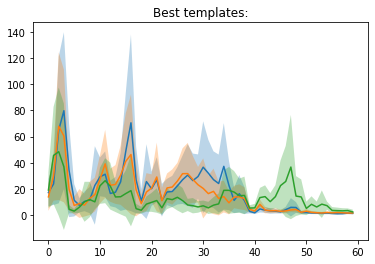

In [43]:
KP = list(range(100, 700, 10))

plt.title('Best templates:')

_templates = {}

for category, cat_data in data_processed.items():
    if category not in ('red', 'green', 'blue'):
        continue
    _template = make_template(cat_data, KP)
    _templates[category] = _template
    plt.plot(_template[0])
    plt.fill_between(np.arange(_template[0].shape[0]), _template[0] + _template[1], _template[0] - _template[1], alpha=0.3)

for cat, cdata in data_processed.items():
    for i, (rate, sample) in enumerate(cdata):
        best_inc, _ = match(rate, sample, _templates, 4, KP)
        best, _ = match(rate, sample, _templates, 4, KP, False)
        print(f'{cat}_{i}', best_inc, best, sep='\t')

In [128]:
def preprocess_fft_ns(rate, signal, n, s, w):
    assert rate == 48000 and signal.shape[0] == rate
    fft = np.abs(scipy.fft.fft(signal)) / signal.shape[0]
    return np.convolve(fft, np.ones(n) / n, 'valid')[:w:s]

def make_template_ns(signals, n, s, w):
    ffts = [preprocess_fft_ns(rate, signal, n, s, w) for rate, signal in signals]
    return np.mean(ffts, 0), np.std(ffts, 0)

def match_ns(rate, signal, templates, threshold, n, s, w):
    fft = preprocess_fft_ns(rate, signal, n, s, w)
    matches = [np.mean(((tm - fft) / ts) ** 2) for tm, ts in templates.values()]

    best = list(templates.keys())[np.argmin(matches)] if np.min(matches) < threshold else 'None'
    cat_matched = np.sum(np.array(matches) < threshold)

    return best, matches

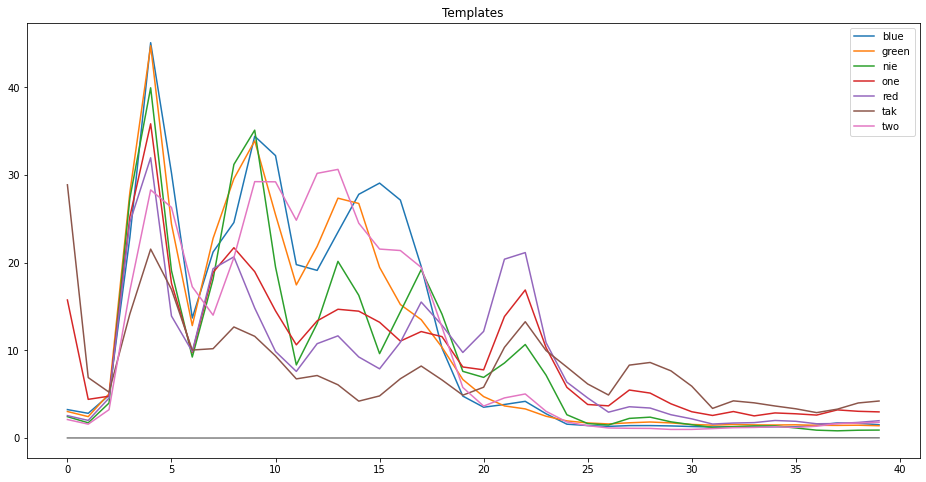

sample	  match	  blue	  green	  nie	  one	  red	  tak	  two	  _

blue_0	  blue	  0.85	  2.51	  2.54	  3.07	  8.73	  22.13	  1.57	  873920.72
blue_1	  None	  1.06	  2.72	  3.15	  3.50	  9.95	  24.30	  1.93	  969290.84
blue_2	  None	  1.19	  7.46	  5.42	  2.41	  6.04	  15.65	  1.31	  713181.89
blue_3	  blue	  0.80	  4.94	  3.97	  3.06	  7.82	  18.47	  1.24	  801232.35
blue_4	  blue	  0.36	  1.80	  3.85	  2.25	  6.21	  15.13	  0.93	  601731.10
blue_5	  blue	  0.43	  1.59	  4.37	  2.68	  7.71	  17.31	  1.32	  675662.94
blue_6	  None	  1.01	  3.70	  7.50	  2.95	  9.79	  27.71	  1.42	  834500.72
blue_7	  blue	  0.85	  3.04	  7.06	  3.35	  10.65	  30.73	  1.41	  922129.13
blue_8	  blue	  0.72	  2.06	  1.45	  2.48	  6.21	  19.46	  1.18	  693050.56
blue_9	  blue	  0.83	  2.25	  1.74	  2.80	  7.15	  22.05	  1.27	  759558.86
blue_10	  None	  1.30	  2.98	  7.59	  1.39	  2.79	  6.79	  2.96	  240116.41
blue_11	  None	  1.25	  2.28	  5.29	  1.38	  2.42	  5.95	  2.86	  247671.60
blue_12	  None	  1.20	

two_3	  None	  2.70	  9.67	  20.12	  1.91	  5.44	  14.92	  1.17	  482738.61
two_4	  None	  2.19	  10.21	  5.99	  3.14	  8.80	  23.97	  1.10	  686454.81
two_5	  None	  1.58	  7.32	  8.21	  3.71	  11.18	  27.62	  1.18	  767940.46
two_6	  two	  1.17	  4.18	  2.30	  2.91	  8.25	  22.73	  0.94	  722345.53
two_7	  two	  1.20	  3.09	  2.46	  3.50	  9.69	  26.48	  0.92	  819579.10
two_8	  two	  1.83	  5.07	  6.02	  4.03	  11.22	  31.15	  0.73	  755442.96
two_9	  two	  1.89	  4.04	  7.75	  4.60	  13.00	  34.44	  0.96	  832811.37
two_10	  None	  2.30	  3.73	  1.62	  1.38	  1.72	  1.57	  1.54	  49760.47
two_11	  None	  2.41	  3.93	  1.75	  1.35	  1.68	  1.61	  1.68	  54997.02
two_12	  two	  1.37	  2.19	  1.48	  1.41	  2.07	  4.06	  0.83	  64280.44
two_13	  two	  1.33	  2.02	  1.76	  1.37	  2.01	  3.80	  0.76	  62472.70
two_14	  two	  1.19	  2.64	  1.24	  1.26	  1.69	  1.79	  0.75	  58601.18
two_15	  two	  1.07	  2.37	  1.32	  1.22	  1.64	  1.93	  0.68	  64018.78
two_16	  nie	  1.22	  2.05	  0.97	

In [129]:
THRESHOLD = 1

N,S,W = 50, 25, 1000

templates_ns = {}

plt.figure(figsize=(16, 8))
plt.title('Templates')
for category, cat_data in data_processed.items():
    template = make_template_ns(cat_data, N,S,W)
    templates_ns[category] = template
    plt.plot(template[0], label=category)
plt.legend()
plt.show()

results = []

print('sample', 'match', *templates.keys(), sep='\t  ')
print()

for category, cat_data in data_processed.items():
    for i, (rate, signal) in enumerate(cat_data):
        best, matches = match_ns(rate, signal, templates_ns, THRESHOLD, N,S,W)
        results.append((category, best))
        print(f'{category}_{i}', best, *map("{:.2f}".format, matches), sep='\t  ')
results = np.array(results)

In [157]:
results_nst = {}
for N in (2, 5, 10, 20, 50, 100):
    for S in (N // 2, N):
        for W in (250, 500, 750, 1000):
            for THRESHOLD in (1, 1.5, 2, 2.5, 3):
                results = []
                for test_i in range(0,len(list(data_processed.values())[0]),2):
                    train_data = {c: v[:i] + v[i+2:] for c, v in data_processed.items()}
                    val_data = {c: v[i:i+2] for c, v in data_processed.items()}

                    templates_ns = {}

                    for category, cat_data in train_data.items():
                        template = make_template_ns(cat_data, N,S,W)
                        templates_ns[category] = template

                    for category, cat_data in val_data.items():
                        for i, (rate, signal) in enumerate(cat_data):
                            best, matches = match_ns(rate, signal, templates_ns, THRESHOLD, N,S,W)
                            results.append((category, best))
                results = np.array(results)

                results_nst[(N,S,W,THRESHOLD)] = results
                print(*(N, S, W, THRESHOLD), np.mean(results[:,0] == results[:,1]), sep='\t')

2	1	250	1	0.5
2	1	250	1.5	0.625
2	1	250	2	0.6875
2	1	250	2.5	0.6875
2	1	250	3	0.6875
2	1	500	1	0.5
2	1	500	1.5	0.625
2	1	500	2	0.625
2	1	500	2.5	0.625
2	1	500	3	0.625
2	1	750	1	0.375
2	1	750	1.5	0.75
2	1	750	2	0.8125
2	1	750	2.5	0.8125
2	1	750	3	0.875
2	1	1000	1	0.3125
2	1	1000	1.5	0.6875
2	1	1000	2	0.8125
2	1	1000	2.5	0.875
2	1	1000	3	0.875
2	2	250	1	0.5
2	2	250	1.5	0.625
2	2	250	2	0.625
2	2	250	2.5	0.625
2	2	250	3	0.625
2	2	500	1	0.5
2	2	500	1.5	0.625
2	2	500	2	0.625
2	2	500	2.5	0.625
2	2	500	3	0.625
2	2	750	1	0.375
2	2	750	1.5	0.75
2	2	750	2	0.8125
2	2	750	2.5	0.8125
2	2	750	3	0.875
2	2	1000	1	0.3125
2	2	1000	1.5	0.6875
2	2	1000	2	0.8125
2	2	1000	2.5	0.875
2	2	1000	3	0.875
5	2	250	1	0.5
5	2	250	1.5	0.625
5	2	250	2	0.625
5	2	250	2.5	0.625
5	2	250	3	0.625
5	2	500	1	0.5
5	2	500	1.5	0.625
5	2	500	2	0.625
5	2	500	2.5	0.625
5	2	500	3	0.625
5	2	750	1	0.4375
5	2	750	1.5	0.75
5	2	750	2	0.8125
5	2	750	2.5	0.8125
5	2	750	3	0.875
5	2	1000	1	0.375
5	2	1000	1.5	0.6875
5	2	1000	2	0.8125
5	2	1000	2

rgb accuracies and precisions
2	1	250	1	0.6875	0.6666666666666666
2	1	250	1.5	0.75	0.6
2	1	250	2	0.8125	0.6666666666666666
2	1	250	2.5	0.8125	0.6666666666666666
2	1	250	3	0.8125	0.6666666666666666
2	1	500	1	0.6875	0.6666666666666666
2	1	500	1.5	0.75	0.5714285714285714
2	1	500	2	0.75	0.5714285714285714
2	1	500	2.5	0.75	0.5714285714285714
2	1	500	3	0.75	0.5714285714285714
2	1	750	1	0.6875	1.0
2	1	750	1.5	0.875	0.8
2	1	750	2	0.875	0.8
2	1	750	2.5	0.875	0.8
2	1	750	3	0.875	0.8
2	1	1000	1	0.6875	1.0
2	1	1000	1.5	0.875	0.8
2	1	1000	2	0.875	0.8
2	1	1000	2.5	0.875	0.8
2	1	1000	3	0.875	0.8
2	2	250	1	0.6875	0.6666666666666666
2	2	250	1.5	0.75	0.5714285714285714
2	2	250	2	0.75	0.5714285714285714
2	2	250	2.5	0.75	0.5714285714285714
2	2	250	3	0.75	0.5714285714285714
2	2	500	1	0.6875	0.6666666666666666
2	2	500	1.5	0.75	0.5714285714285714
2	2	500	2	0.75	0.5714285714285714
2	2	500	2.5	0.75	0.5714285714285714
2	2	500	3	0.75	0.5714285714285714
2	2	750	1	0.6875	1.0
2	2	750	1.5	0.875	0.8
2	2	750	2	0.875	0

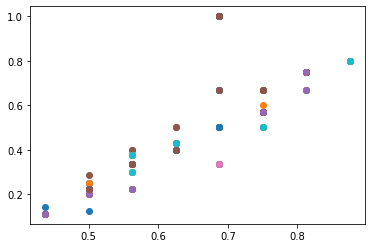

In [160]:
RGB = ('red', 'green', 'blue')

print('rgb accuracies and precisions')
for (N, S, W, T), res in results_nst.items():
    res = np.where(np.isin(res, RGB), res, 'None')
    acc = np.mean(res[:,0] == res[:,1])
    prec = np.sum(np.isin(res[:,1], RGB) * (res[:,0] == res[:,1])) / np.isin(res[:,1], RGB).sum()
    print(*(N, S, W, T), acc, prec, sep='\t')
    plt.scatter(acc, prec)

In [201]:
data_processed['red'][0][1][::48000//4000].shape

(4000,)

In [206]:
print('{')
for c in scipy.fft.fft(data_processed['red'][0][1][::48000//2000])[:800]:
    print(f'\t{{{c.real}, {c.imag}}},')
print('}')

{
	{-1611.0, -0.0},
	{2034.8522017124342, -11510.31032737057},
	{-15485.917202451157, -15311.245589385322},
	{-2668.7550511439977, 15527.366716637138},
	{-10840.088015876787, -4815.318954754367},
	{-8982.280173495348, 17539.94860515912},
	{10040.145123260088, -512.8329411021477},
	{-8610.429383972532, 1530.492952092738},
	{4518.562165786956, 2850.367044268081},
	{-9362.177742036103, -3142.7279660225317},
	{5926.039210269688, -730.2057541798886},
	{-9292.729786576288, -2439.624490790354},
	{-4021.226832551333, 10269.938041267822},
	{-3262.5752882615875, -1703.7864455149997},
	{-10269.6662656351, -109.80277818647801},
	{10313.748345116617, -12339.010855138771},
	{-8543.367897618304, 7779.0431969746505},
	{7485.87702217695, 1916.3819684897567},
	{-3790.6298393722345, -1712.614650500932},
	{5478.235235919137, -193.26663103989813},
	{-14689.658353925626, 10503.128251721226},
	{4422.769154858752, 7832.154109626069},
	{3251.6940934360177, -5273.450515675753},
	{-1176.6501849377155, 758.837069